In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import json
import requests
import calendar
import datetime


In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [3]:
saved_style_state = matplotlib.rcParams.copy()

Grab data locally

In [4]:
filepath = "~/code1161base/OpenData/autos.csv"
if os.path.isfile("~/code1161base/OpenData/autos.csv"):
    print "loading from file"

autos_data = pd.read_csv(filepath)
print "done"

done


# Converting variables 'dateCrawled', 'dateCreated', 'lastSeen' to DateTime

In [5]:
autos_data = pd.read_csv(filepath,
                           infer_datetime_format=True,
                           parse_dates=['dateCrawled', 'dateCreated', 'lastSeen'],
                           dayfirst=True)

autos_data.head(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3T�RER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21


In [6]:
autos_data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3T�RER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21


Get categories headings (columns) for autos_data

In [7]:
autos_data.columns

Index([u'dateCrawled', u'name', u'seller', u'offerType', u'price', u'abtest',
       u'vehicleType', u'yearOfRegistration', u'gearbox', u'powerPS', u'model',
       u'kilometer', u'monthOfRegistration', u'fuelType', u'brand',
       u'notRepairedDamage', u'dateCreated', u'nrOfPictures', u'postalCode',
       u'lastSeen'],
      dtype='object')

# Dropping odd case = row (129969)

In [8]:
autos_data.drop([129969], axis=0, inplace=True)

Using iloc to index a row as Series
*** row number - 1 ***

# Testings the types of objects in Autos.csv

In [9]:
type(autos_data.index)

pandas.indexes.numeric.Int64Index

In [10]:
rowOne = autos_data.iloc[0]
rowOne

dateCrawled            2016-03-24 11:52:17
name                            Golf_3_1.6
seller                              privat
offerType                          Angebot
price                                  480
abtest                                test
vehicleType                            NaN
yearOfRegistration                    1993
gearbox                            manuell
powerPS                                  0
model                                 golf
kilometer                           150000
monthOfRegistration                      0
fuelType                            benzin
brand                           volkswagen
notRepairedDamage                      NaN
dateCreated            2016-03-24 00:00:00
nrOfPictures                             0
postalCode                           70435
lastSeen               2016-04-07 03:16:57
Name: 0, dtype: object

In [11]:
rowOne["dateCrawled"]

Timestamp('2016-03-24 11:52:17')

indexing a column on a data frame

In [12]:
dateCrawled = autos_data["dateCrawled"]

dateCrawled

0        2016-03-24 11:52:17
1        2016-03-24 10:58:45
2        2016-03-14 12:52:21
3        2016-03-17 16:54:04
4        2016-03-31 17:25:20
5        2016-04-04 17:36:23
6        2016-04-01 20:48:51
7        2016-03-21 18:54:38
8        2016-04-04 23:42:13
9        2016-03-17 10:53:50
10       2016-03-26 19:54:18
11       2016-04-07 10:06:22
12       2016-03-15 22:49:09
13       2016-03-21 21:37:40
14       2016-03-21 12:57:01
15       2016-03-11 21:39:15
16       2016-04-01 12:46:46
17       2016-03-20 10:25:19
18       2016-03-23 15:48:05
19       2016-04-01 22:55:47
20       2016-04-01 19:56:48
21       2016-03-27 11:38:00
22       2016-03-23 14:52:51
23       2016-03-12 19:43:07
24       2016-03-13 20:40:49
25       2016-03-18 21:44:09
26       2016-03-10 19:38:18
27       2016-03-07 12:51:23
28       2016-03-09 11:56:38
29       2016-03-08 19:55:19
                 ...        
371498   2016-03-11 15:50:38
371499   2016-03-08 13:52:00
371500   2016-03-21 23:40:49
371501   2016-

In [13]:
name = autos_data["name"]

name

0                                                Golf_3_1.6
1                                      A5_Sportback_2.7_Tdi
2                            Jeep_Grand_Cherokee_"Overland"
3                                        GOLF_4_1_4__3T�RER
4                            Skoda_Fabia_1.4_TDI_PD_Classic
5         BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...
6                               Peugeot_206_CC_110_Platinum
7                              VW_Derby_Bj_80__Scheunenfund
8                      Ford_C___Max_Titanium_1_0_L_EcoBoost
9         VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...
10                                        Mazda_3_1.6_Sport
11            Volkswagen_Passat_Variant_2.0_TDI_Comfortline
12                        VW_Passat_Facelift_35i__"7Sitzer"
13                           VW_PASSAT_1.9_TDI_131_PS_LEDER
14        Nissan_Navara_2.5DPF_SE4x4_Klima_Sitzheizg_Blu...
15                             KA_Lufthansa_Edition_450�_VB
16                                      

In [14]:
seller = autos_data["seller"]

seller

0         privat
1         privat
2         privat
3         privat
4         privat
5         privat
6         privat
7         privat
8         privat
9         privat
10        privat
11        privat
12        privat
13        privat
14        privat
15        privat
16        privat
17        privat
18        privat
19        privat
20        privat
21        privat
22        privat
23        privat
24        privat
25        privat
26        privat
27        privat
28        privat
29        privat
           ...  
371498    privat
371499    privat
371500    privat
371501    privat
371502    privat
371503    privat
371504    privat
371505    privat
371506    privat
371507    privat
371508    privat
371509    privat
371510    privat
371511    privat
371512    privat
371513    privat
371514    privat
371515    privat
371516    privat
371517    privat
371518    privat
371519    privat
371520    privat
371521    privat
371522    privat
371523    privat
371524    privat
371525    priv

In [15]:
offerType = autos_data["offerType"]

offerType

0         Angebot
1         Angebot
2         Angebot
3         Angebot
4         Angebot
5         Angebot
6         Angebot
7         Angebot
8         Angebot
9         Angebot
10        Angebot
11        Angebot
12        Angebot
13        Angebot
14        Angebot
15        Angebot
16        Angebot
17        Angebot
18        Angebot
19        Angebot
20        Angebot
21        Angebot
22        Angebot
23        Angebot
24        Angebot
25        Angebot
26        Angebot
27        Angebot
28        Angebot
29        Angebot
           ...   
371498    Angebot
371499    Angebot
371500    Angebot
371501    Angebot
371502    Angebot
371503    Angebot
371504    Angebot
371505    Angebot
371506    Angebot
371507    Angebot
371508    Angebot
371509    Angebot
371510    Angebot
371511    Angebot
371512    Angebot
371513    Angebot
371514    Angebot
371515    Angebot
371516    Angebot
371517    Angebot
371518    Angebot
371519    Angebot
371520    Angebot
371521    Angebot
371522    

In [16]:
price = autos_data["price"]

price

0           480
1         18300
2          9800
3          1500
4          3600
5           650
6          2200
7             0
8         14500
9           999
10         2000
11         2799
12          999
13         2500
14        17999
15          450
16          300
17         1750
18         7550
19         1850
20        10400
21         3699
22         2900
23          450
24          500
25         2500
26         5555
27         6900
28         1990
29          690
          ...  
371498      699
371499      600
371500    20400
371501     3900
371502     1600
371503     1700
371504     2600
371505      800
371506     5900
371507     5999
371508     1400
371509     1900
371510     6500
371511     1999
371512     5000
371513     4400
371514      999
371515     1690
371516     1490
371517     7900
371518     3999
371519     5250
371520     3200
371521     1150
371522        0
371523     2200
371524     1199
371525     9200
371526     3400
371527    28990
Name: price, dtype: int6

In [17]:
abtest = autos_data["abtest"]

abtest

0            test
1            test
2            test
3            test
4            test
5            test
6            test
7            test
8         control
9            test
10        control
11        control
12        control
13        control
14        control
15           test
16           test
17        control
18           test
19           test
20        control
21           test
22           test
23           test
24           test
25        control
26        control
27           test
28           test
29           test
           ...   
371498    control
371499    control
371500       test
371501       test
371502       test
371503    control
371504    control
371505       test
371506       test
371507       test
371508    control
371509       test
371510       test
371511    control
371512       test
371513    control
371514    control
371515       test
371516    control
371517       test
371518       test
371519    control
371520    control
371521    control
371522    

In [18]:
vehicleType = autos_data["vehicleType"]

vehicleType

0                NaN
1              coupe
2                suv
3         kleinwagen
4         kleinwagen
5          limousine
6             cabrio
7          limousine
8                bus
9         kleinwagen
10         limousine
11             kombi
12             kombi
13             kombi
14               suv
15        kleinwagen
16               NaN
17        kleinwagen
18               bus
19               bus
20             coupe
21         limousine
22               NaN
23        kleinwagen
24         limousine
25             kombi
26               NaN
27         limousine
28               bus
29        kleinwagen
             ...    
371498     limousine
371499    kleinwagen
371500     limousine
371501           bus
371502         kombi
371503    kleinwagen
371504           NaN
371505         kombi
371506     limousine
371507         kombi
371508     limousine
371509           NaN
371510     limousine
371511     limousine
371512     limousine
371513     limousine
371514       

In [19]:
yearOfRego = autos_data["yearOfRegistration"]

yearOfRego

0         1993
1         2011
2         2004
3         2001
4         2008
5         1995
6         2004
7         1980
8         2014
9         1998
10        2004
11        2005
12        1995
13        2004
14        2011
15        1910
16        2016
17        2004
18        2007
19        2004
20        2009
21        2002
22        2018
23        1997
24        1990
25        2002
26        2017
27        2008
28        1981
29        2003
          ... 
371498    1999
371499    1998
371500    2014
371501    2003
371502    1998
371503    1999
371504    2005
371505    2000
371506    2006
371507    2005
371508    2001
371509    2000
371510    2003
371511    1997
371512    2003
371513    2008
371514    2000
371515    2004
371516    1998
371517    2010
371518    2005
371519    2016
371520    2004
371521    2000
371522    2005
371523    2005
371524    2000
371525    1996
371526    2002
371527    2013
Name: yearOfRegistration, dtype: int64

In [20]:
gearbox = autos_data["gearbox"]

gearbox

0           manuell
1           manuell
2         automatik
3           manuell
4           manuell
5           manuell
6           manuell
7           manuell
8           manuell
9           manuell
10          manuell
11          manuell
12          manuell
13          manuell
14          manuell
15              NaN
16              NaN
17        automatik
18          manuell
19          manuell
20          manuell
21        automatik
22          manuell
23          manuell
24          manuell
25        automatik
26          manuell
27          manuell
28          manuell
29          manuell
            ...    
371498      manuell
371499      manuell
371500    automatik
371501    automatik
371502      manuell
371503      manuell
371504    automatik
371505      manuell
371506      manuell
371507      manuell
371508      manuell
371509      manuell
371510    automatik
371511      manuell
371512    automatik
371513      manuell
371514      manuell
371515      manuell
371516      manuell


In [21]:
powerPS = autos_data["powerPS"]

powerPS

0           0
1         190
2         163
3          75
4          69
5         102
6         109
7          50
8         125
9         101
10        105
11        140
12        115
13        131
14        190
15          0
16         60
17         75
18        136
19        102
20        160
21        231
22         90
23         50
24        118
25        193
26        125
27         99
28         50
29         60
         ... 
371498    101
371499     54
371500    150
371501    174
371502    125
371503     68
371504      0
371505    101
371506    105
371507    140
371508    125
371509    110
371510    145
371511    150
371512    260
371513    105
371514     95
371515     55
371516     50
371517    140
371518      3
371519    150
371520    225
371521      0
371522      0
371523      0
371524    101
371525    102
371526    100
371527    320
Name: powerPS, dtype: int64

In [22]:
model = autos_data["model"]

model

0                golf
1                 NaN
2               grand
3                golf
4               fabia
5                 3er
6             2_reihe
7              andere
8               c_max
9                golf
10            3_reihe
11             passat
12             passat
13             passat
14             navara
15                 ka
16               polo
17             twingo
18              c_max
19           a_klasse
20           scirocco
21                5er
22             meriva
23              arosa
24             andere
25                5er
26                 c4
27              civic
28        transporter
29              punto
             ...     
371498         vectra
371499          corsa
371500           golf
371501        voyager
371502             a4
371503          justy
371504       c_klasse
371505          astra
371506           golf
371507             a4
371508          astra
371509            NaN
371510       e_klasse
371511             a3
371512    

In [23]:
km = autos_data["kilometer"]

km

0         150000
1         125000
2         125000
3         150000
4          90000
5         150000
6         150000
7          40000
8          30000
9         150000
10        150000
11        150000
12        150000
13        150000
14         70000
15          5000
16        150000
17        150000
18        150000
19        150000
20        100000
21        150000
22        150000
23        150000
24        150000
25        150000
26        125000
27         60000
28          5000
29        150000
           ...  
371498    150000
371499    150000
371500     30000
371501    150000
371502    150000
371503     70000
371504    150000
371505    150000
371506    150000
371507    150000
371508    150000
371509    150000
371510    150000
371511    150000
371512    150000
371513    150000
371514    150000
371515    150000
371516    150000
371517    150000
371518    150000
371519    150000
371520    150000
371521    150000
371522    150000
371523     20000
371524    125000
371525    1500

# Converting Month integer into Month

Before:

In [24]:
monthOfRego = autos_data["monthOfRegistration"]

monthOfRego

0          0
1          5
2          8
3          6
4          7
5         10
6          8
7          7
8          8
9          0
10        12
11        12
12        11
13         2
14         3
15         0
16         0
17         2
18         6
19         1
20         4
21         7
22         5
23         5
24        10
25         9
26         4
27        11
28         1
29         3
          ..
371498     3
371499     1
371500     9
371501     7
371502     2
371503    11
371504     9
371505    11
371506     9
371507     4
371508     2
371509     7
371510     3
371511    12
371512    12
371513     7
371514     4
371515     4
371516     9
371517     7
371518     5
371519    12
371520     5
371521     3
371522     7
371523     1
371524     3
371525     3
371526     6
371527     8
Name: monthOfRegistration, dtype: int64

In [25]:
autos_data['monthOfRegistration'] = autos_data['monthOfRegistration'].apply(lambda x: calendar.month_abbr[x])

Using a variable instead:

In [26]:
monthOfRego = monthOfRego.apply(lambda x: calendar.month_abbr[x])

monthOfRego

0            
1         May
2         Aug
3         Jun
4         Jul
5         Oct
6         Aug
7         Jul
8         Aug
9            
10        Dec
11        Dec
12        Nov
13        Feb
14        Mar
15           
16           
17        Feb
18        Jun
19        Jan
20        Apr
21        Jul
22        May
23        May
24        Oct
25        Sep
26        Apr
27        Nov
28        Jan
29        Mar
         ... 
371498    Mar
371499    Jan
371500    Sep
371501    Jul
371502    Feb
371503    Nov
371504    Sep
371505    Nov
371506    Sep
371507    Apr
371508    Feb
371509    Jul
371510    Mar
371511    Dec
371512    Dec
371513    Jul
371514    Apr
371515    Apr
371516    Sep
371517    Jul
371518    May
371519    Dec
371520    May
371521    Mar
371522    Jul
371523    Jan
371524    Mar
371525    Mar
371526    Jun
371527    Aug
Name: monthOfRegistration, dtype: object

In [27]:
# months_map = {1: 'January', 
#               2: 'February', 
#               3: 'March', 
#               4: 'April', 
#               5: 'May', 
#               6: 'June', 
#               7: 'July',
#               8: 'August',
#               9: 'September',
#               10: 'October',
#               11: 'November',
#               12: 'December'
#              }
# def mapper(monthOfRegistration):
#     return months_map[monthOfRegistration]

# autos_data['monthOfRegistration'].apply(mapper)

# Cars with no 'monthsOfRego' needs a variable name

In [28]:
fuelType = autos_data["fuelType"]

fuelType

0         benzin
1         diesel
2         diesel
3         benzin
4         diesel
5         benzin
6         benzin
7         benzin
8         benzin
9            NaN
10        benzin
11        diesel
12        benzin
13           NaN
14        diesel
15        benzin
16        benzin
17        benzin
18        diesel
19        benzin
20        benzin
21        benzin
22        benzin
23        benzin
24        benzin
25        diesel
26           NaN
27        benzin
28        benzin
29        benzin
           ...  
371498    benzin
371499    benzin
371500    benzin
371501    benzin
371502    benzin
371503    benzin
371504       NaN
371505    benzin
371506    diesel
371507    diesel
371508    benzin
371509       NaN
371510    diesel
371511    benzin
371512    diesel
371513    diesel
371514    benzin
371515    benzin
371516    benzin
371517    diesel
371518    diesel
371519       NaN
371520    benzin
371521    benzin
371522    benzin
371523       NaN
371524    benzin
371525    dies

In [29]:
brand = autos_data["brand"]

brand

0             volkswagen
1                   audi
2                   jeep
3             volkswagen
4                  skoda
5                    bmw
6                peugeot
7             volkswagen
8                   ford
9             volkswagen
10                 mazda
11            volkswagen
12            volkswagen
13            volkswagen
14                nissan
15                  ford
16            volkswagen
17               renault
18                  ford
19         mercedes_benz
20            volkswagen
21                   bmw
22                  opel
23                  seat
24         mercedes_benz
25                   bmw
26               citroen
27                 honda
28            volkswagen
29                  fiat
               ...      
371498              opel
371499              opel
371500        volkswagen
371501          chrysler
371502              audi
371503            subaru
371504     mercedes_benz
371505              opel
371506        volkswagen


In [30]:
damaged = autos_data["notRepairedDamage"]

damaged

0          NaN
1           ja
2          NaN
3         nein
4         nein
5           ja
6         nein
7         nein
8          NaN
9          NaN
10        nein
11          ja
12         NaN
13        nein
14        nein
15         NaN
16         NaN
17        nein
18        nein
19        nein
20        nein
21        nein
22        nein
23        nein
24          ja
25          ja
26        nein
27        nein
28        nein
29        nein
          ... 
371498     NaN
371499    nein
371500    nein
371501    nein
371502    nein
371503    nein
371504     NaN
371505      ja
371506    nein
371507     NaN
371508    nein
371509    nein
371510    nein
371511    nein
371512      ja
371513    nein
371514     NaN
371515     NaN
371516    nein
371517    nein
371518    nein
371519    nein
371520      ja
371521    nein
371522      ja
371523     NaN
371524    nein
371525    nein
371526     NaN
371527    nein
Name: notRepairedDamage, dtype: object

In [31]:
dateCreated = autos_data['dateCreated']

dateCreated

0        2016-03-24
1        2016-03-24
2        2016-03-14
3        2016-03-17
4        2016-03-31
5        2016-04-04
6        2016-04-01
7        2016-03-21
8        2016-04-04
9        2016-03-17
10       2016-03-26
11       2016-04-07
12       2016-03-15
13       2016-03-21
14       2016-03-21
15       2016-03-11
16       2016-04-01
17       2016-03-20
18       2016-03-23
19       2016-04-01
20       2016-04-01
21       2016-03-27
22       2016-03-23
23       2016-03-12
24       2016-03-13
25       2016-03-18
26       2016-03-10
27       2016-03-07
28       2016-03-09
29       2016-03-08
            ...    
371498   2016-03-11
371499   2016-03-08
371500   2016-03-21
371501   2016-03-26
371502   2016-04-01
371503   2016-03-31
371504   2016-03-07
371505   2016-04-03
371506   2016-03-20
371507   2016-03-16
371508   2016-04-02
371509   2016-03-11
371510   2016-03-05
371511   2016-03-31
371512   2016-03-25
371513   2016-03-21
371514   2016-04-04
371515   2016-03-09
371516   2016-04-04


In [32]:
pictures = autos_data['nrOfPictures']

pictures

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
371498    0
371499    0
371500    0
371501    0
371502    0
371503    0
371504    0
371505    0
371506    0
371507    0
371508    0
371509    0
371510    0
371511    0
371512    0
371513    0
371514    0
371515    0
371516    0
371517    0
371518    0
371519    0
371520    0
371521    0
371522    0
371523    0
371524    0
371525    0
371526    0
371527    0
Name: nrOfPictures, dtype: int64

In [33]:
postCode = autos_data['postalCode']

postCode

0         70435
1         66954
2         90480
3         91074
4         60437
5         33775
6         67112
7         19348
8         94505
9         27472
10        96224
11        57290
12        37269
13        90762
14         4177
15        24148
16        38871
17        65599
18        88361
19        49565
20        75365
21        68309
22        49716
23         9526
24        35390
25        73765
26        31139
27        12621
28        87471
29        86199
          ...  
371498    65936
371499    24850
371500    38470
371501    34320
371502    34414
371503    90439
371504    61169
371505    58730
371506     1217
371507    56472
371508    23820
371509    87700
371510    60437
371511     4275
371512    90473
371513    45896
371514    88477
371515    18246
371516    48653
371517    75223
371518    81825
371519    51371
371520    96465
371521    26624
371522     2694
371523    39576
371524    26135
371525    87439
371526    40764
371527    73326
Name: postalCode, dtype:

In [34]:
lastSeen = autos_data['lastSeen']

lastSeen

0        2016-04-07 03:16:57
1        2016-04-07 01:46:50
2        2016-04-05 12:47:46
3        2016-03-17 17:40:17
4        2016-04-06 10:17:21
5        2016-04-06 19:17:07
6        2016-04-05 18:18:39
7        2016-03-25 16:47:58
8        2016-04-04 23:42:13
9        2016-03-31 17:17:06
10       2016-04-06 10:45:34
11       2016-04-07 10:25:17
12       2016-04-01 13:16:16
13       2016-03-23 02:50:54
14       2016-04-06 07:45:42
15       2016-03-19 08:46:47
16       2016-04-01 12:46:46
17       2016-04-06 13:16:07
18       2016-04-05 18:45:11
19       2016-04-05 22:46:05
20       2016-04-05 16:45:49
21       2016-04-07 06:44:26
22       2016-03-31 01:16:33
23       2016-03-21 01:46:11
24       2016-03-13 20:40:49
25       2016-03-18 21:44:09
26       2016-03-16 09:16:46
27       2016-03-26 09:44:53
28       2016-03-10 07:44:33
29       2016-03-09 11:45:28
                 ...        
371498   2016-03-17 12:44:29
371499   2016-03-13 00:16:40
371500   2016-04-07 04:17:32
371501   2016-

# Counting Objects in Each Series

In [35]:
dateCrawledCount = dateCrawled.value_counts()

dateCrawledCount

2016-03-24 14:49:47    7
2016-03-26 22:57:31    6
2016-03-19 21:49:56    6
2016-03-20 16:50:22    5
2016-03-31 16:50:28    5
2016-03-22 14:50:05    5
2016-03-29 22:50:49    5
2016-03-08 15:50:29    5
2016-04-01 19:25:23    5
2016-04-01 16:52:05    5
2016-03-05 14:44:30    5
2016-03-22 10:42:10    5
2016-03-19 12:50:39    5
2016-04-02 14:50:21    5
2016-03-26 10:51:07    5
2016-04-01 15:56:46    5
2016-04-02 21:54:36    5
2016-03-16 13:47:44    5
2016-03-16 17:43:49    5
2016-03-09 13:50:56    5
2016-04-02 22:54:55    5
2016-03-22 15:50:32    5
2016-03-28 10:48:11    5
2016-03-21 14:50:20    5
2016-03-05 14:25:23    5
2016-04-03 13:41:21    5
2016-04-04 22:38:11    5
2016-03-14 16:51:53    5
2016-03-09 16:48:39    5
2016-03-31 17:57:07    5
                      ..
2016-03-16 11:53:34    1
2016-03-11 14:52:42    1
2016-03-19 16:37:43    1
2016-03-30 13:55:25    1
2016-03-08 20:36:50    1
2016-03-28 10:56:58    1
2016-03-14 20:49:40    1
2016-03-06 14:47:06    1
2016-03-31 14:45:13    1


In [36]:
nameCount = name.value_counts()

nameCount

Ford_Fiesta                                                           657
BMW_318i                                                              627
Opel_Corsa                                                            622
Volkswagen_Golf_1.4                                                   603
BMW_316i                                                              523
BMW_320i                                                              492
Volkswagen_Polo                                                       475
Renault_Twingo                                                        447
Volkswagen_Golf                                                       428
Volkswagen_Golf_1.6                                                   413
Volkswagen_Polo_1.2                                                   412
BMW_116i                                                              394
Opel_Corsa_1.2_16V                                                    373
Opel_Corsa_B                          

In [37]:
sellerCount = seller.value_counts()

sellerCount

privat        371524
gewerblich         3
Name: seller, dtype: int64

In [38]:
offerTypeCount = offerType.value_counts()

offerTypeCount

Angebot    371515
Gesuch         12
Name: offerType, dtype: int64

In [39]:
priceCount = price.value_counts()

priceCount

0          10778
500         5670
1500        5394
1000        4649
1200        4594
2500        4438
600         3819
3500        3792
800         3784
2000        3432
999         3364
750         3203
650         3150
4500        3053
850         2946
2200        2936
700         2936
1800        2886
900         2874
950         2793
1100        2772
1300        2757
300         2731
3000        2720
550         2591
1600        2570
5500        2543
350         2514
400         2442
1250        2441
           ...  
2125           1
22599          1
4782           1
8008           1
20290          1
50100          1
3245           1
58800          1
2795000        1
75400          1
137999         1
19269          1
5544           1
13485          1
3755           1
14666          1
28995          1
4175           1
10670          1
77             1
8265           1
145900         1
2730           1
12973          1
42840          1
30530          1
23456          1
171000        

In [40]:
abtestCount = abtest.value_counts()

abtestCount

test       192584
control    178943
Name: abtest, dtype: int64

In [41]:
vehicleTypeCount = vehicleType.value_counts()

vehicleTypeCount

limousine     95894
kleinwagen    80023
kombi         67564
bus           30201
cabrio        22898
coupe         19015
suv           14707
andere         3356
Name: vehicleType, dtype: int64

In [42]:
yearOfRegoCount = yearOfRego.value_counts()

yearOfRegoCount

2000    24551
1999    22767
2005    22316
2006    20230
2001    20218
2003    19873
2004    19746
2002    19189
1998    17951
2007    17673
2008    16175
2009    15607
1997    14706
2010    12354
2011    12068
1996    10885
2017    10546
2016     9859
1995     9658
2012     9418
2013     6157
1994     4872
2014     4802
2018     3993
1993     3469
1992     3048
2015     2982
1990     2852
1991     2810
1989     1342
        ...  
5900        1
2066        1
6500        1
9229        1
8500        1
8200        1
2290        1
3700        1
1200        1
9450        1
1001        1
1255        1
1253        1
5600        1
3800        1
4800        1
7100        1
5300        1
3500        1
1911        1
2200        1
1688        1
1925        1
3200        1
1920        1
1919        1
1915        1
7800        1
1400        1
8455        1
Name: yearOfRegistration, dtype: int64

In [43]:
gearboxCount = gearbox.value_counts()

gearboxCount

manuell      274213
automatik     77105
Name: gearbox, dtype: int64

In [44]:
powerPSCount = powerPS.value_counts()

powerPSCount

0        40820
75       24035
60       15907
150      15442
140      13585
101      13313
90       12748
116      11963
170      10982
105      10429
125       7051
136       6952
102       6500
163       6287
54        5752
143       5547
122       5322
131       5179
110       4862
109       4817
50        4661
80        4050
120       3914
177       3886
58        3855
69        3655
115       3332
95        3023
45        2991
68        2828
         ...  
1367         1
15017        1
685          1
7515         1
6062         1
1625         1
1707         1
1105         1
6226         1
584          1
332          1
8011         1
15033        1
3144         1
442          1
953          1
3000         1
331          1
587          1
1100         1
5809         1
952          1
696          1
589          1
1102         1
1870         1
5815         1
16051        1
1360         1
1398         1
Name: powerPS, dtype: int64

PowerPS will need some cleaning up

In [45]:
modelCount = model.value_counts()

modelCount

golf                  30070
andere                26400
3er                   20567
polo                  13092
corsa                 12573
astra                 10830
passat                10306
a4                    10257
c_klasse               8775
5er                    8546
e_klasse               7561
a3                     6604
a6                     6023
focus                  5950
fiesta                 5775
transporter            5528
twingo                 4953
2_reihe                4816
fortwo                 4338
a_klasse               4316
vectra                 4255
1er                    3837
mondeo                 3626
clio                   3553
touran                 3540
3_reihe                3503
punto                  3349
zafira                 3049
megane                 2927
ibiza                  2702
                      ...  
mii                      81
crossfire                66
range_rover_evoque       65
gl                       64
nubira              

In [46]:
kmCount = km.value_counts()

kmCount

150000    240796
125000     38067
100000     15920
90000      12523
80000      11053
70000       9773
60000       8669
50000       7615
5000        7069
40000       6376
30000       6041
20000       5676
10000       1949
Name: kilometer, dtype: int64

In [47]:
monthOfRegoCount = monthOfRego.value_counts()

monthOfRegoCount

       37675
Mar    36170
Jun    33167
Apr    30918
May    30631
Jul    28958
Oct    27337
Nov    25489
Dec    25380
Sep    25074
Jan    24560
Aug    23765
Feb    22403
Name: monthOfRegistration, dtype: int64

monthOfRego seems to have an extra column, Cars with no monthOfRego will be assigned to a new variable.

In [48]:
fuelTypeCount = fuelType.value_counts()

fuelTypeCount

benzin     223857
diesel     107746
lpg          5378
cng           571
hybrid        278
andere        207
elektro       104
Name: fuelType, dtype: int64

In [49]:
brandCount = brand.value_counts()

brandCount

volkswagen        79640
bmw               40274
opel              40136
mercedes_benz     35309
audi              32873
ford              25573
renault           17969
peugeot           11027
fiat               9676
seat               7022
mazda              5695
skoda              5641
smart              5249
citroen            5182
nissan             5037
toyota             4694
sonstige_autos     3981
hyundai            3646
mini               3394
volvo              3327
mitsubishi         3061
honda              2836
kia                2555
alfa_romeo         2345
suzuki             2328
porsche            2215
chevrolet          1845
chrysler           1452
dacia               900
jeep                807
daihatsu            806
subaru              779
land_rover          770
jaguar              621
trabant             591
daewoo              542
saab                530
rover               490
lancia              484
lada                225
Name: brand, dtype: int64

In [50]:
damagedCount = damaged.value_counts()

damagedCount

nein    263182
ja       36285
Name: notRepairedDamage, dtype: int64

In [51]:
dateCreatedCount = dateCreated.value_counts()

dateCreatedCount

2016-04-03    14450
2016-04-04    14022
2016-03-20    13547
2016-03-12    13379
2016-03-21    13305
2016-03-14    13088
2016-03-28    13069
2016-04-02    12991
2016-03-07    12821
2016-03-19    12752
2016-03-09    12723
2016-03-29    12714
2016-04-01    12623
2016-03-30    12402
2016-03-15    12399
2016-03-08    12396
2016-03-25    12264
2016-03-11    12180
2016-03-10    12050
2016-03-22    11958
2016-03-26    11920
2016-03-31    11872
2016-03-23    11856
2016-03-17    11610
2016-03-16    11285
2016-03-27    11161
2016-03-24    11132
2016-03-05     8528
2016-03-13     6318
2016-03-06     5752
              ...  
2016-01-20        2
2016-01-18        2
2015-11-23        2
2016-01-22        2
2015-11-24        2
2016-01-16        2
2016-02-04        2
2016-01-14        1
2015-12-28        1
2015-03-20        1
2015-12-06        1
2015-11-08        1
2015-10-14        1
2015-06-18        1
2015-06-11        1
2015-12-17        1
2015-11-10        1
2015-08-07        1
2015-12-27        1


In [52]:
picturesCount = pictures.value_counts()

picturesCount

0    371527
Name: nrOfPictures, dtype: int64

Seems to be a bug, non of the listings have pictures

In [53]:
postCodeCount = postCode.value_counts()

postCodeCount

10115    828
65428    637
66333    349
38518    326
44145    323
32257    323
52525    314
78224    309
26789    301
48599    294
13357    293
53757    284
50354    283
40764    282
48249    282
60311    281
51065    278
52249    277
60386    275
61169    269
92637    266
26871    265
66424    265
56070    262
45881    262
65719    261
13409    257
87700    257
59192    254
44339    254
        ... 
55499      1
67311      1
21784      1
38325      1
63874      1
21360      1
95356      1
26906      1
29361      1
17154      1
79685      1
91471      1
88376      1
77787      1
95694      1
27254      1
60306      1
7619       1
29587      1
91465      1
25946      1
4685       1
98749      1
74937      1
24638      1
97859      1
29484      1
85071      1
17329      1
37297      1
Name: postalCode, dtype: int64

In [54]:
lastSeenCount = lastSeen.value_counts()

lastSeenCount

2016-04-06 13:45:54    17
2016-04-07 06:45:59    17
2016-04-07 07:17:35    16
2016-04-06 09:44:33    16
2016-04-06 04:15:59    16
2016-04-06 02:45:52    16
2016-04-06 04:17:20    16
2016-04-06 12:15:45    16
2016-04-06 09:46:00    16
2016-04-06 13:15:54    16
2016-04-07 09:46:25    16
2016-04-07 06:44:26    16
2016-04-06 01:16:21    16
2016-04-06 05:45:43    16
2016-04-07 13:17:48    16
2016-04-06 08:46:30    16
2016-04-07 06:45:32    16
2016-04-07 09:44:27    16
2016-04-07 00:45:17    16
2016-04-06 17:46:58    16
2016-04-06 22:44:53    16
2016-04-07 08:16:54    16
2016-04-06 10:15:26    16
2016-04-06 07:45:46    16
2016-04-07 09:45:10    16
2016-04-06 09:17:58    16
2016-04-07 09:15:43    16
2016-04-07 07:46:26    16
2016-04-07 00:46:04    16
2016-04-06 10:18:03    16
                       ..
2016-04-03 12:58:34     1
2016-04-02 05:16:06     1
2016-03-22 07:48:52     1
2016-03-26 09:41:00     1
2016-03-14 19:41:48     1
2016-03-17 09:16:59     1
2016-03-14 16:31:22     1
2016-03-30 0

LastSeen could indicate the date/time of the car sold.

# The variables ‘name’, ‘seller’, ‘offerType’, ‘abtest’ and ‘nrOfPictures’ are not meaningful data, and will be removed.

In [55]:
# dropping variables 'name', 'seller','offerType', 'abtest', 'nrOfPictures'

autos_data.drop('name', axis=1, inplace=True)
autos_data.drop('seller', axis=1, inplace=True)
autos_data.drop('offerType', axis=1, inplace=True)
autos_data.drop('abtest', axis=1, inplace=True)
autos_data.drop('nrOfPictures', axis=1, inplace=True)

autos_data.columns

Index([u'dateCrawled', u'price', u'vehicleType', u'yearOfRegistration',
       u'gearbox', u'powerPS', u'model', u'kilometer', u'monthOfRegistration',
       u'fuelType', u'brand', u'notRepairedDamage', u'dateCreated',
       u'postalCode', u'lastSeen'],
      dtype='object')

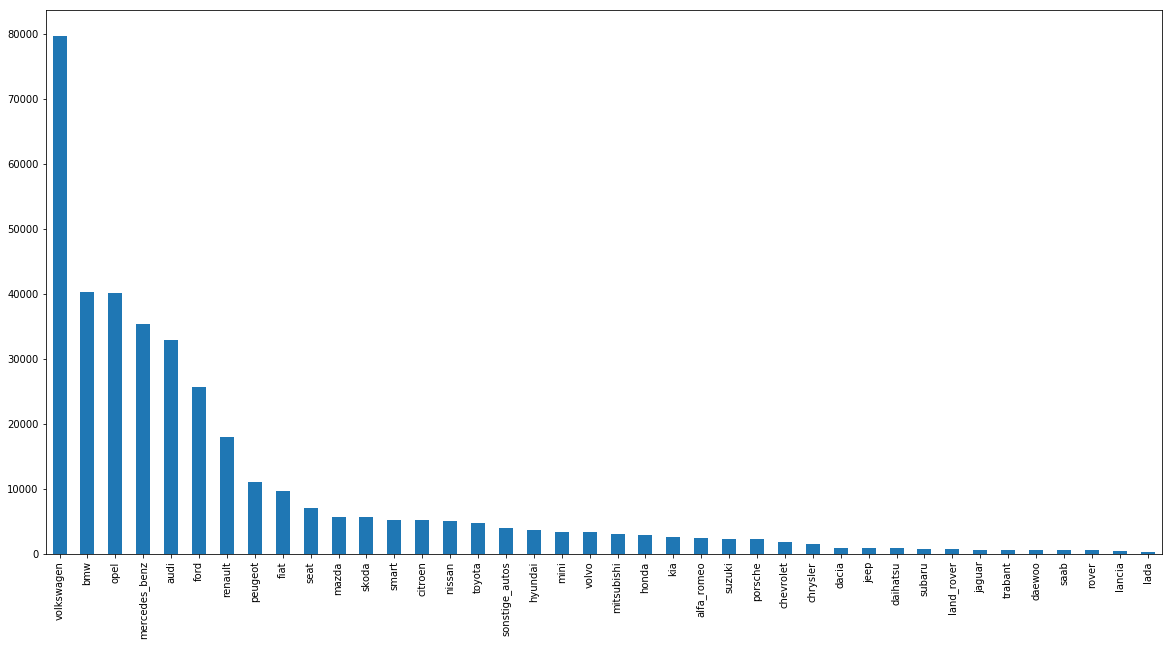

In [56]:
brandCount.plot(kind="bar")

VolksWagen is truely the volk's wagen

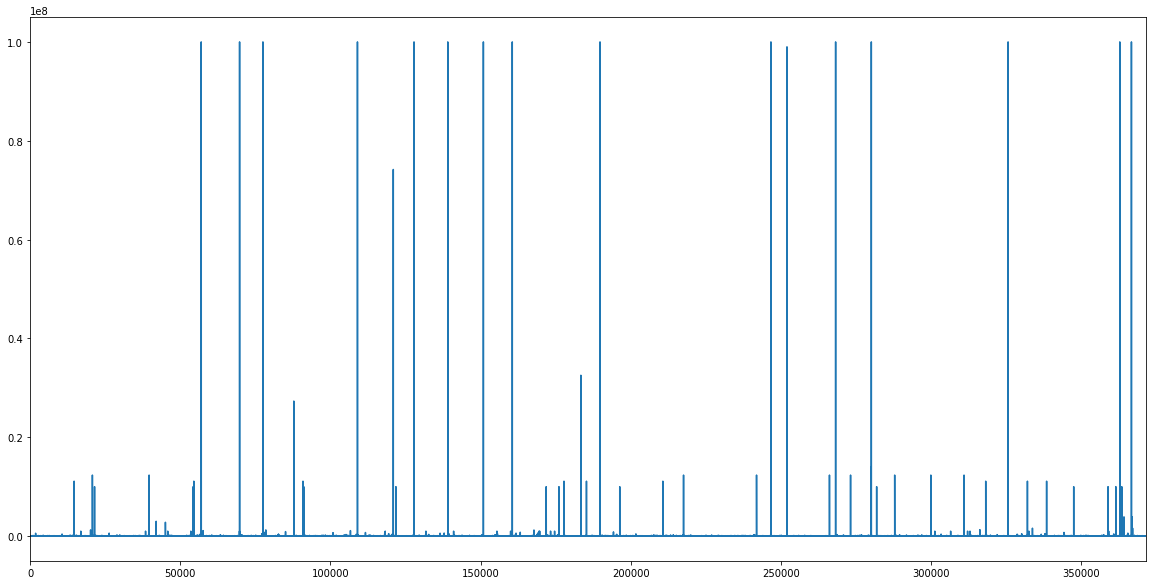

In [57]:
autos_data['price'].plot()

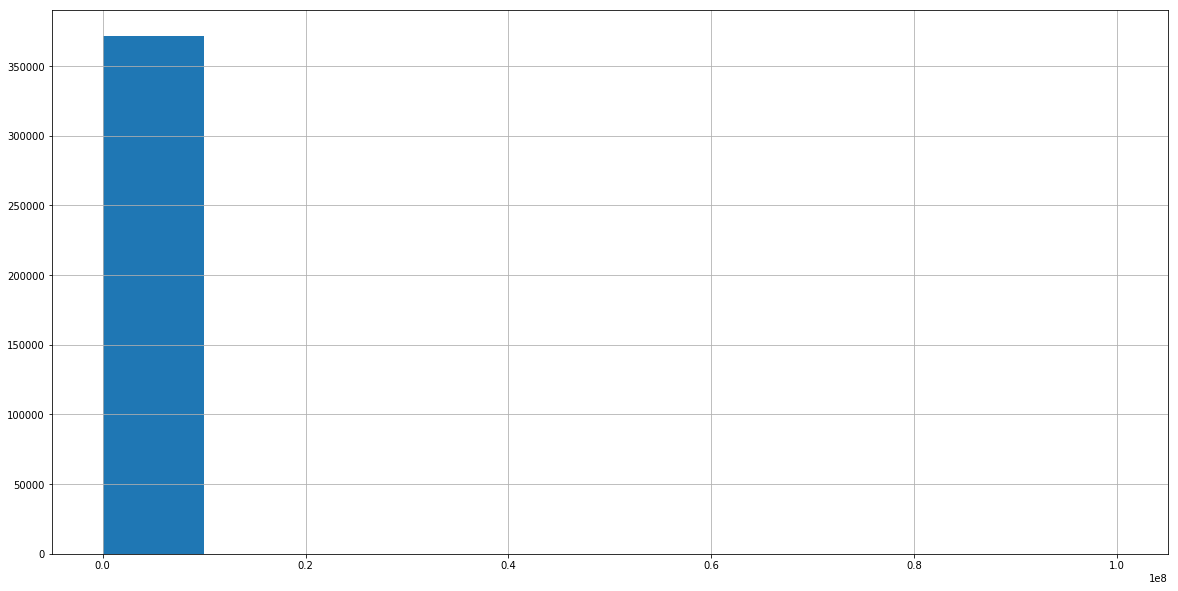

In [58]:
autos_data['price'].hist()

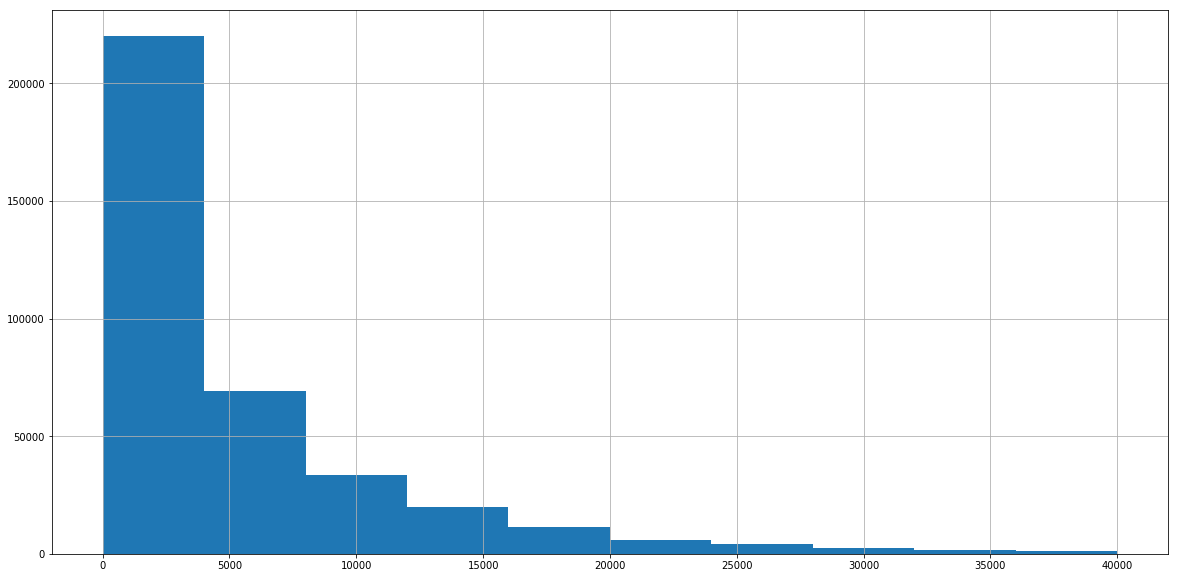

In [59]:
autos_data['price'][autos_data['price'] < 40000].hist()

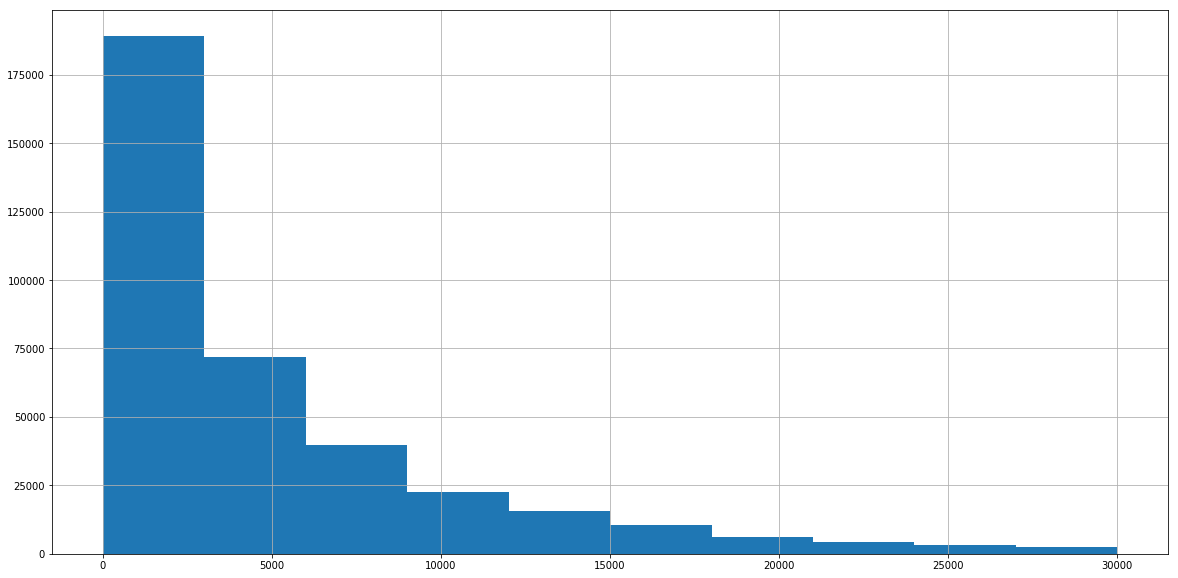

In [60]:
autos_data['price'][autos_data['price'] < 30000].hist()

In [61]:
autos_data['brand'].value_counts()

volkswagen        79640
bmw               40274
opel              40136
mercedes_benz     35309
audi              32873
ford              25573
renault           17969
peugeot           11027
fiat               9676
seat               7022
mazda              5695
skoda              5641
smart              5249
citroen            5182
nissan             5037
toyota             4694
sonstige_autos     3981
hyundai            3646
mini               3394
volvo              3327
mitsubishi         3061
honda              2836
kia                2555
alfa_romeo         2345
suzuki             2328
porsche            2215
chevrolet          1845
chrysler           1452
dacia               900
jeep                807
daihatsu            806
subaru              779
land_rover          770
jaguar              621
trabant             591
daewoo              542
saab                530
rover               490
lancia              484
lada                225
Name: brand, dtype: int64

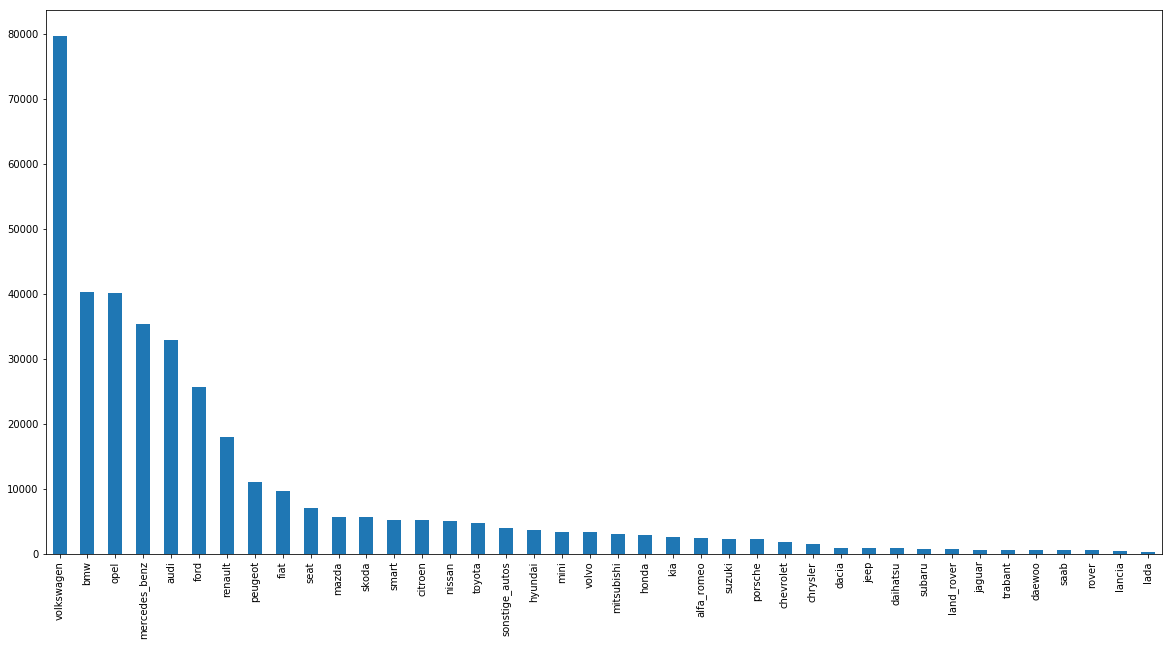

In [62]:
autos_data['brand'].value_counts().plot(kind="bar")

In [63]:
autos_data['powerPS'].value_counts()

0        40820
75       24035
60       15907
150      15442
140      13585
101      13313
90       12748
116      11963
170      10982
105      10429
125       7051
136       6952
102       6500
163       6287
54        5752
143       5547
122       5322
131       5179
110       4862
109       4817
50        4661
80        4050
120       3914
177       3886
58        3855
69        3655
115       3332
95        3023
45        2991
68        2828
         ...  
1367         1
15017        1
685          1
7515         1
6062         1
1625         1
1707         1
1105         1
6226         1
584          1
332          1
8011         1
15033        1
3144         1
442          1
953          1
3000         1
331          1
587          1
1100         1
5809         1
952          1
696          1
589          1
1102         1
1870         1
5815         1
16051        1
1360         1
1398         1
Name: powerPS, dtype: int64

0 powerPS assuming car is not running

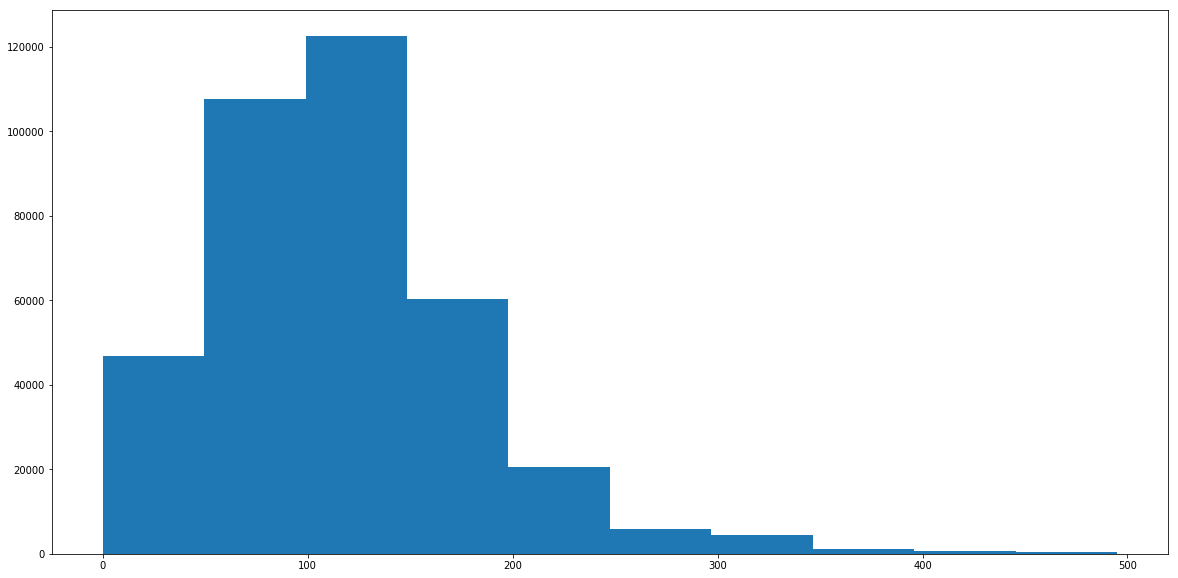

In [64]:
capped_powerPS = autos_data["powerPS"][autos_data['powerPS'] < 500]

plt.hist(capped_powerPS)
plt.show()

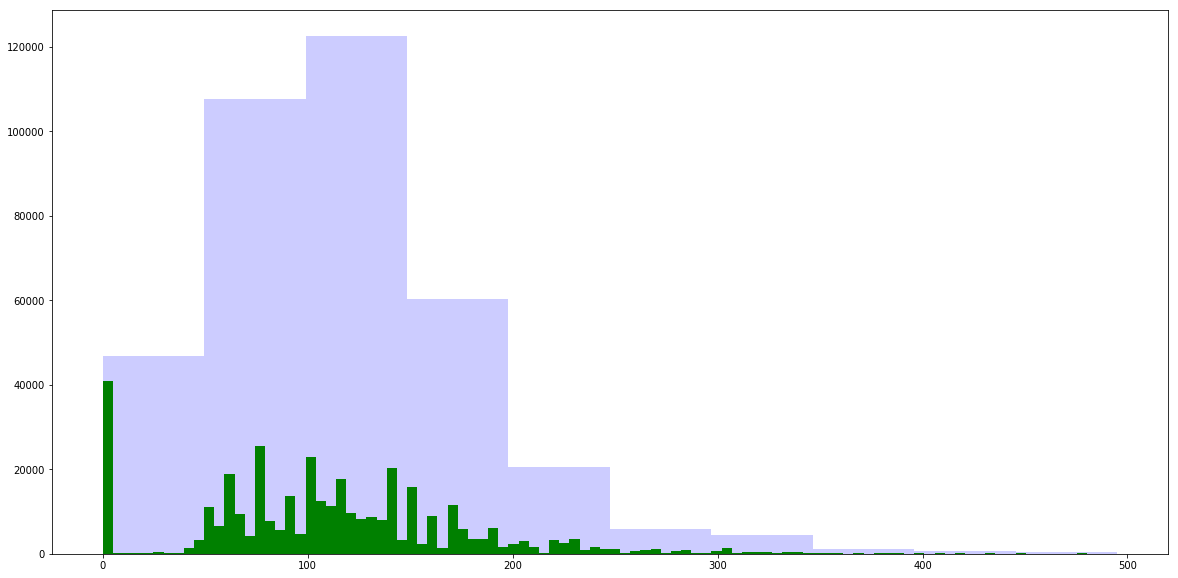

In [65]:
plt.hist(capped_powerPS, bins=10, facecolor='blue', alpha=0.2)
plt.hist(capped_powerPS, bins=100, facecolor='green', alpha=1)
plt.show()

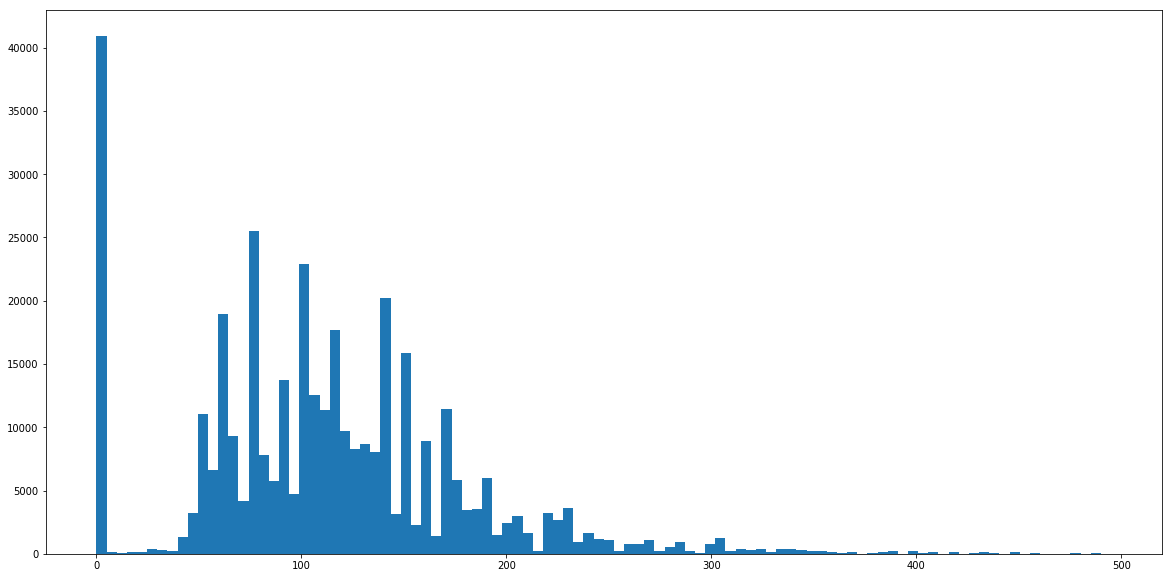

In [66]:
plt.hist(capped_powerPS, bins=100)
plt.show()

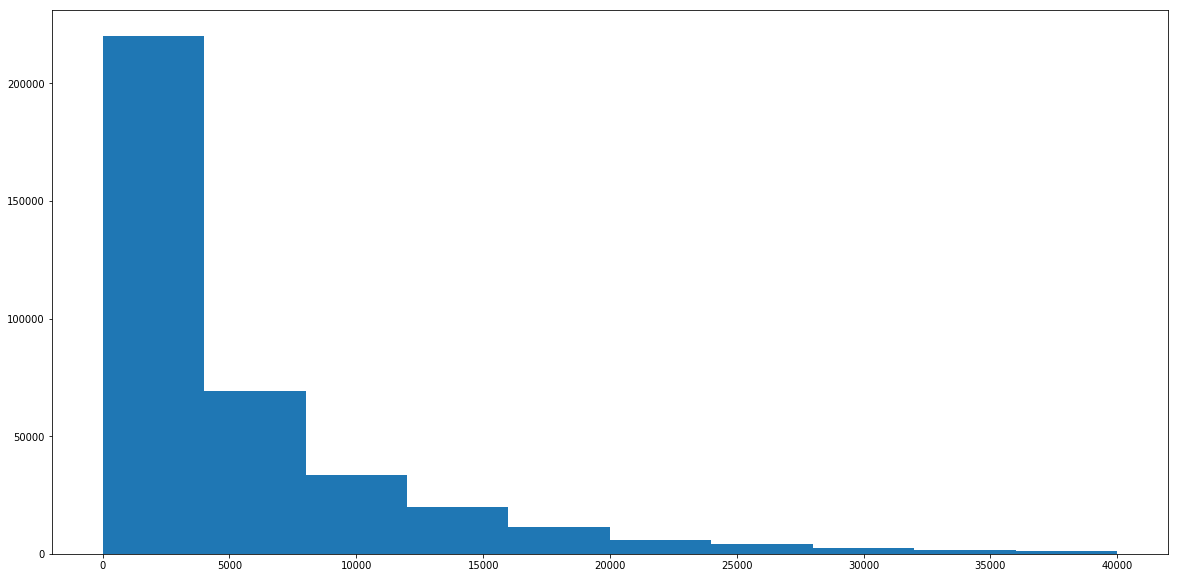

In [67]:
capped_price = autos_data["price"][autos_data['price'] < 40000]

plt.hist(capped_price)
plt.show()

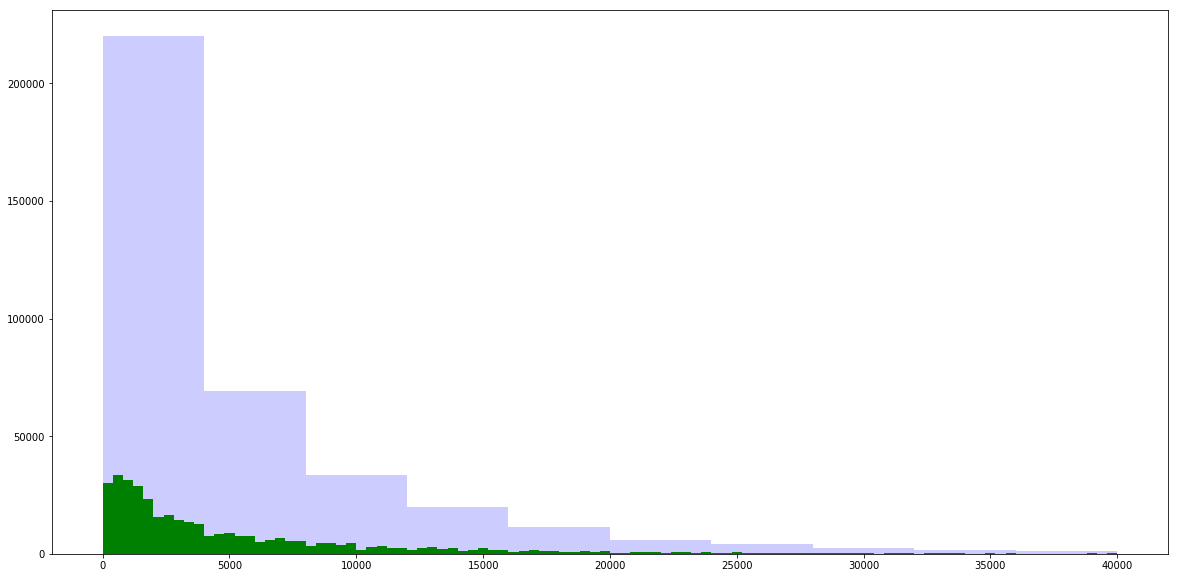

In [68]:
plt.hist(capped_price, bins=10, facecolor='blue', alpha=0.2)
plt.hist(capped_price, bins=100, facecolor='green', alpha=1)
plt.show()

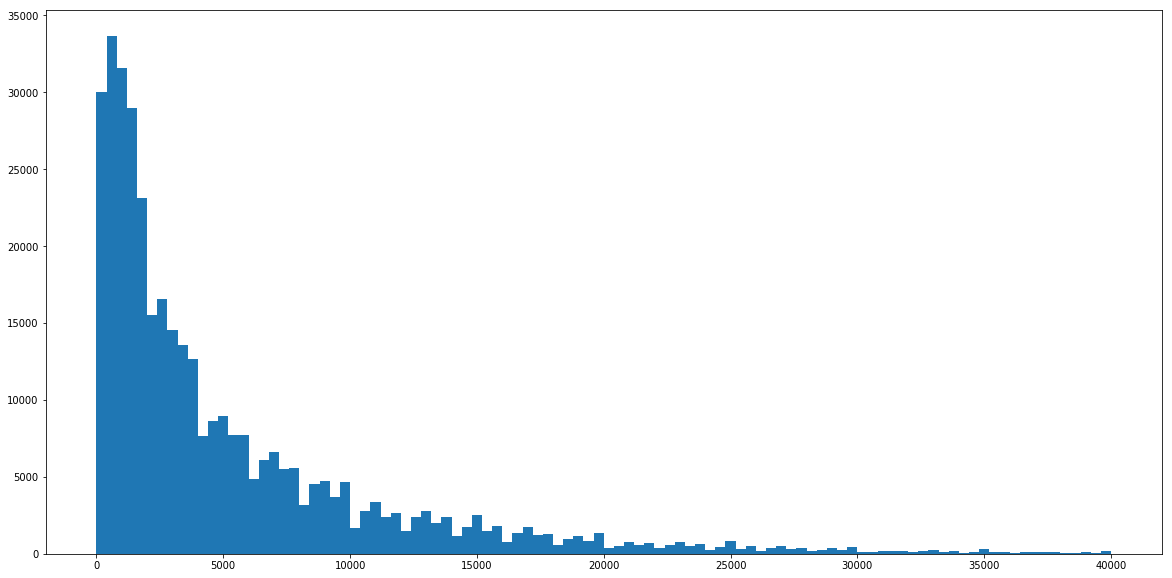

In [69]:
plt.hist(capped_price, bins=100)
plt.show()

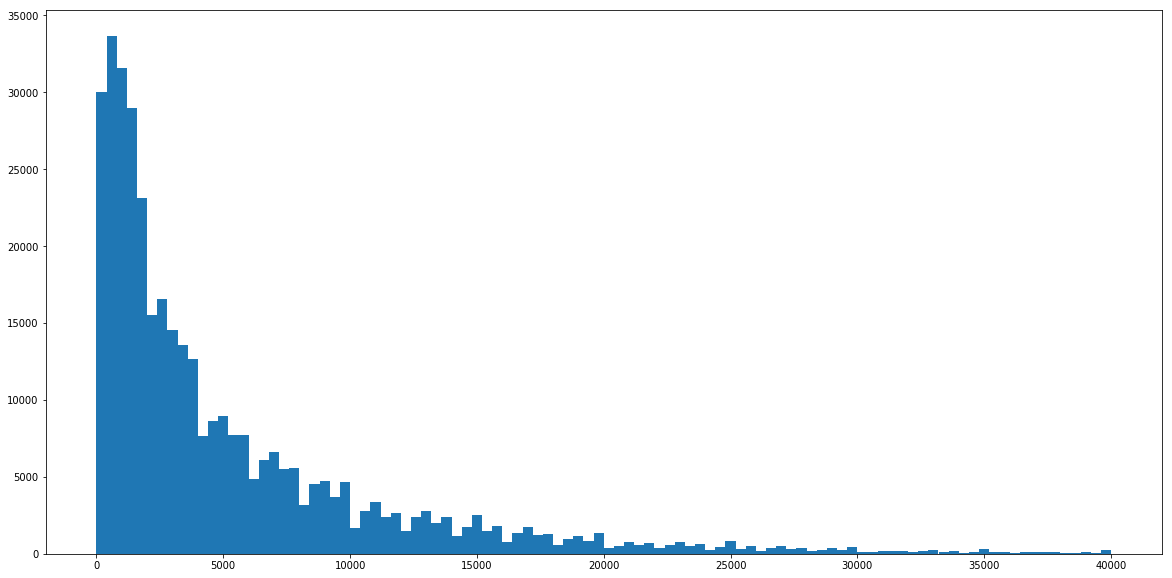

In [70]:
number_of_bins = 100
lower_bound = 0
upper_bound = 40000
plt.hist(autos_data["price"], bins=number_of_bins, range=(lower_bound, upper_bound))
plt.show()

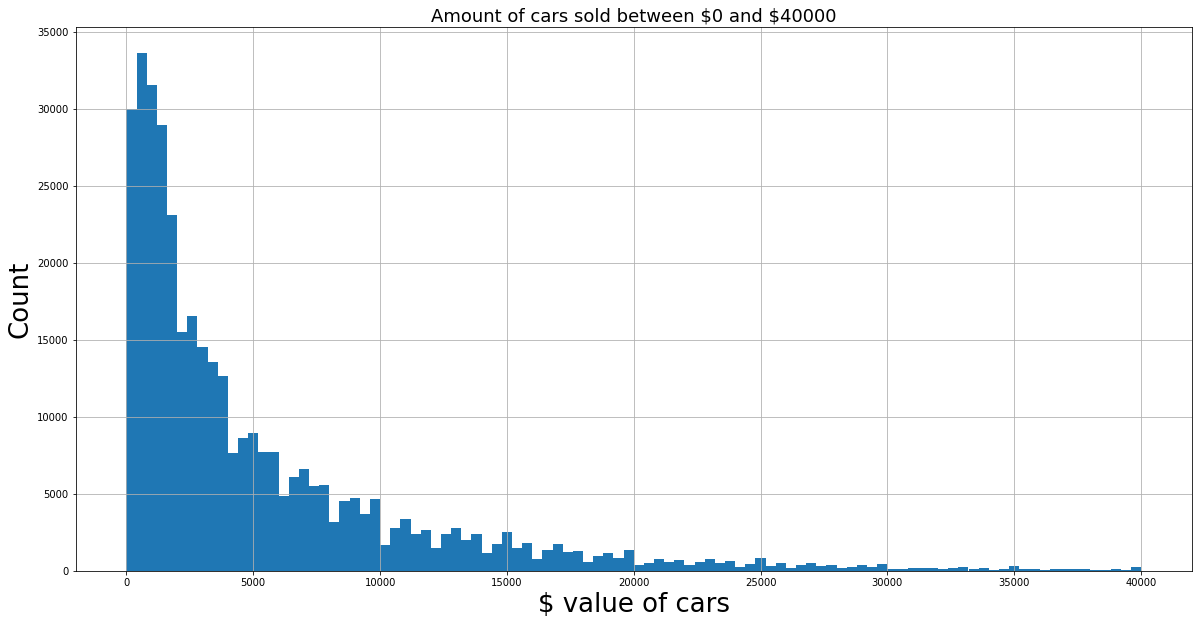

In [71]:
number_of_bins = 100
lower_bound = 0
upper_bound = 40000

plt.hist(autos_data["price"], bins=number_of_bins, range=(lower_bound, upper_bound))
plt.title("Amount of cars sold between \${} and \${}".format("0", str(upper_bound)), fontsize=18)
plt.xlabel('$ value of cars', fontsize=26)
plt.ylabel('Count', fontsize=26)
plt.grid(True)
plt.show()

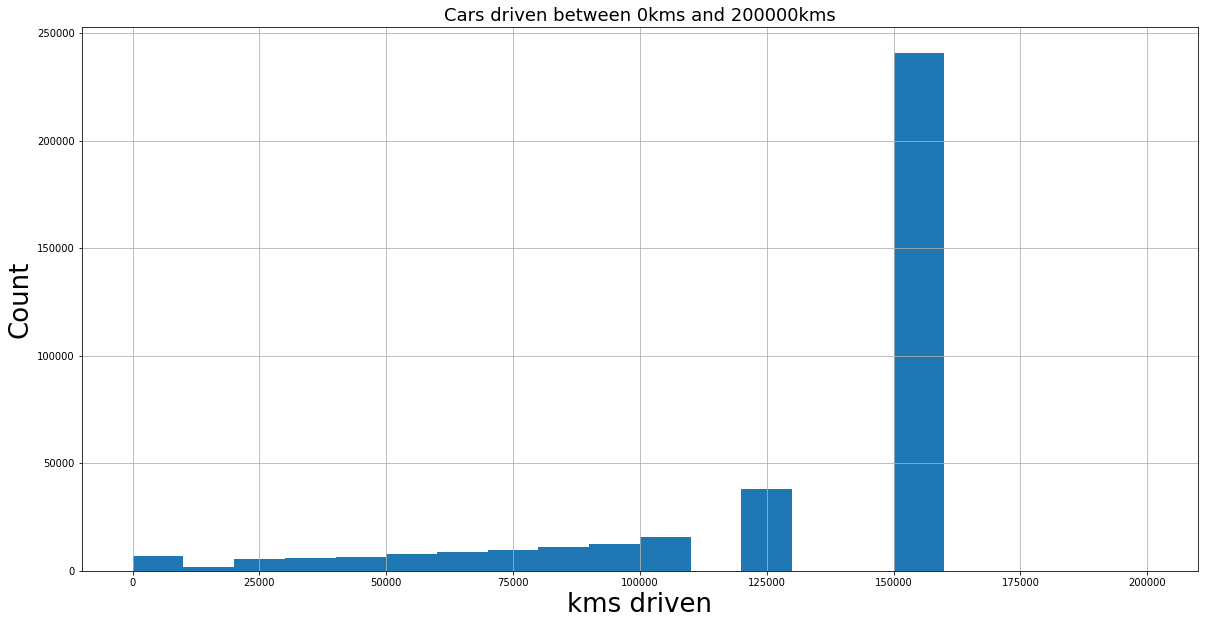

In [72]:
number_of_bins = 20
lower_bound = 0
upper_bound = 200000

plt.hist(autos_data["kilometer"], bins=number_of_bins, range=(lower_bound, upper_bound))
plt.title("Cars driven between {}kms and {}kms".format("0", str(upper_bound)), fontsize=18)
plt.xlabel('kms driven', fontsize=26)
plt.ylabel('Count', fontsize=26)
plt.grid(True)
plt.show()

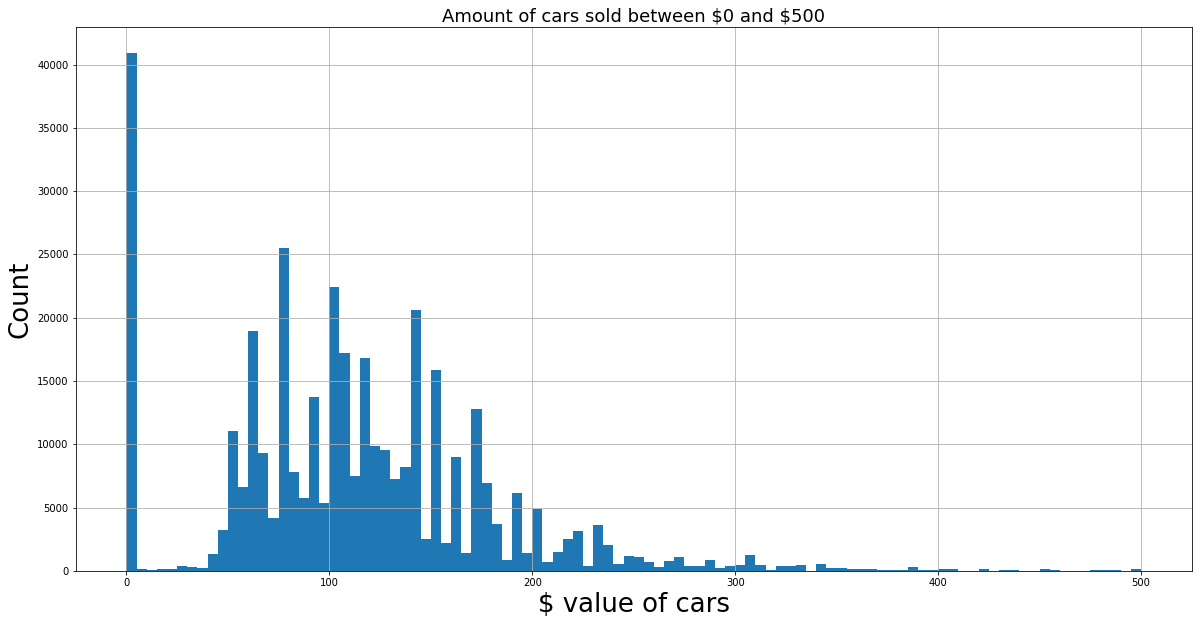

In [73]:
number_of_bins = 100
lower_bound = 0
upper_bound = 500

plt.hist(autos_data["powerPS"], bins=number_of_bins, range=(lower_bound, upper_bound))
plt.title("Amount of cars sold between \${} and \${}".format("0", str(upper_bound)), fontsize=18)
plt.xlabel('$ value of cars', fontsize=26)
plt.ylabel('Count', fontsize=26)
plt.grid(True)
plt.show()

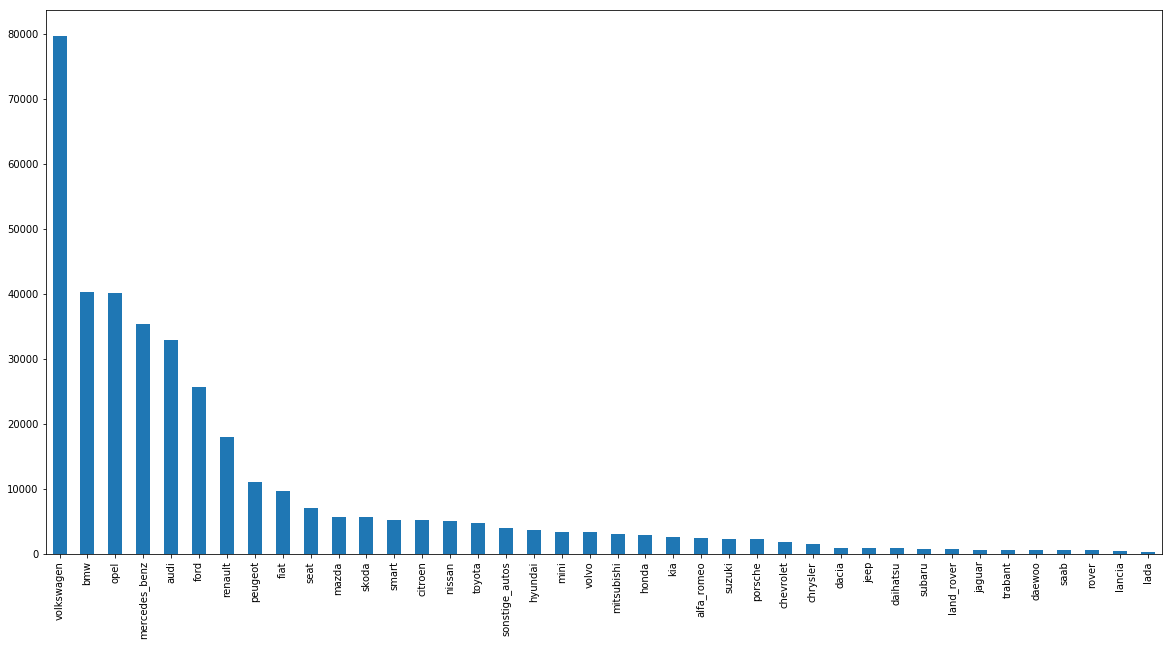

In [74]:
autos_data["brand"].value_counts().plot(kind="bar")

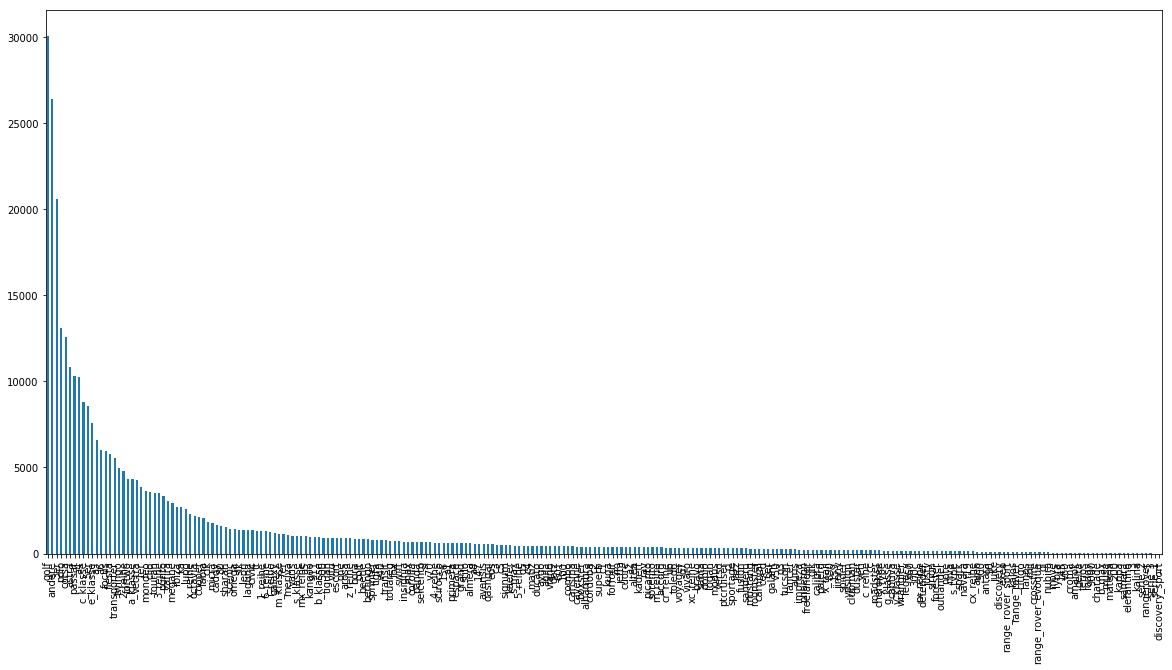

In [75]:
autos_data["model"].value_counts().plot(kind="bar")

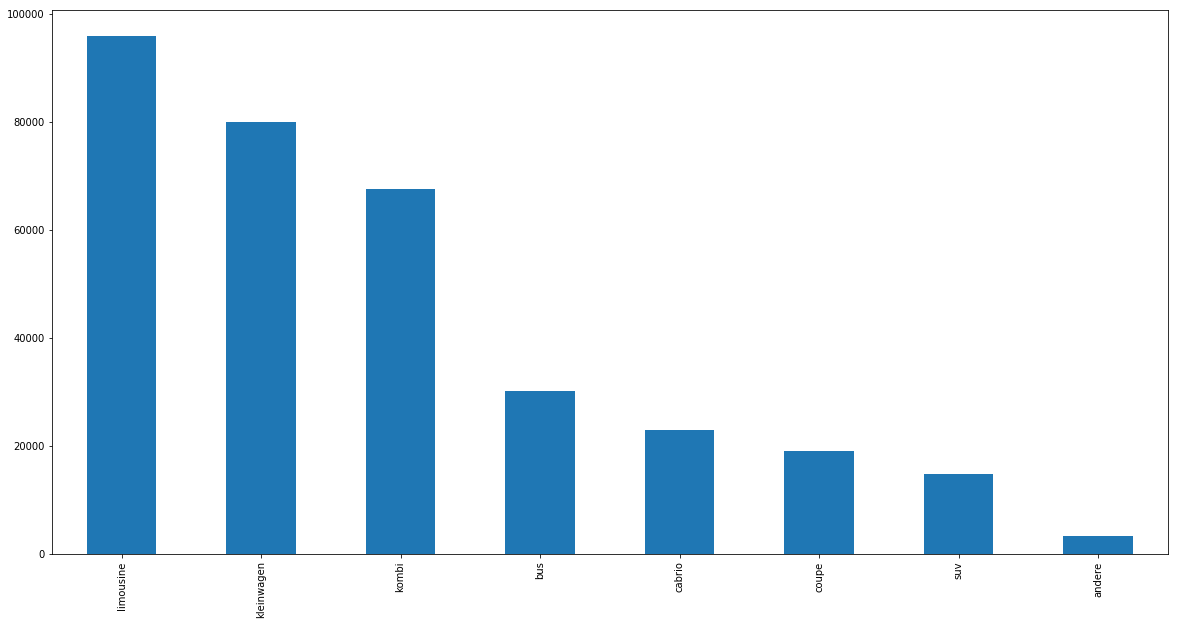

In [76]:
vehicleTypeCount.plot(kind="bar")
# autos_data["vehicleType"].value_counts().plot(kind="bar")

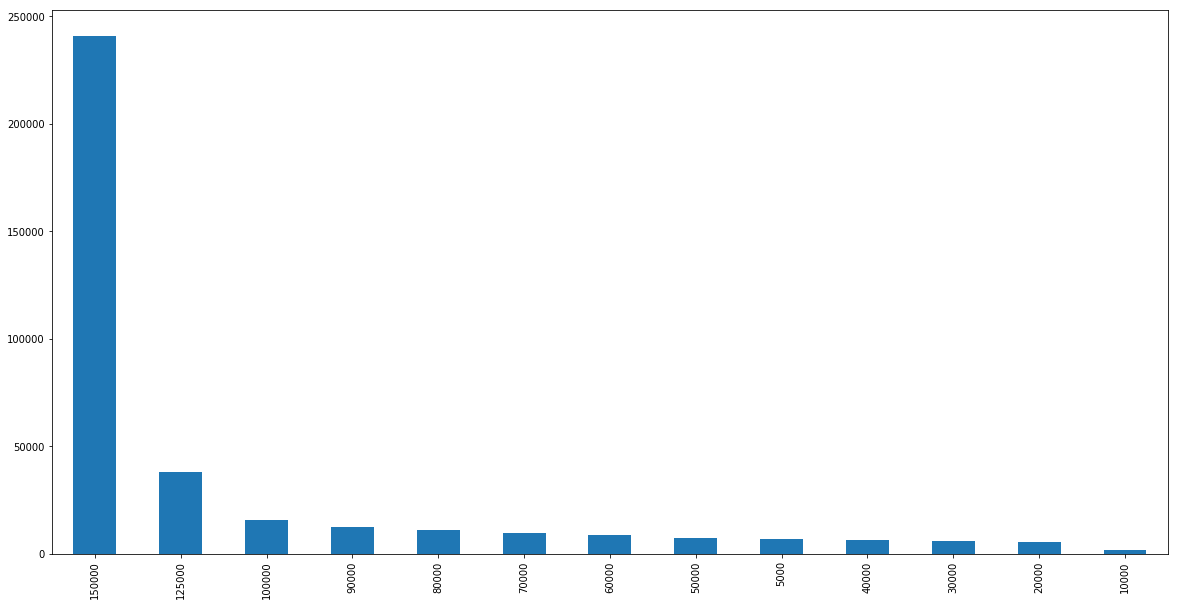

In [77]:
autos_data["kilometer"].value_counts().plot(kind="bar")

In [78]:
autos_data["yearOfRegistration"].value_counts()

2000    24551
1999    22767
2005    22316
2006    20230
2001    20218
2003    19873
2004    19746
2002    19189
1998    17951
2007    17673
2008    16175
2009    15607
1997    14706
2010    12354
2011    12068
1996    10885
2017    10546
2016     9859
1995     9658
2012     9418
2013     6157
1994     4872
2014     4802
2018     3993
1993     3469
1992     3048
2015     2982
1990     2852
1991     2810
1989     1342
        ...  
5900        1
2066        1
6500        1
9229        1
8500        1
8200        1
2290        1
3700        1
1200        1
9450        1
1001        1
1255        1
1253        1
5600        1
3800        1
4800        1
7100        1
5300        1
3500        1
1911        1
2200        1
1688        1
1925        1
3200        1
1920        1
1919        1
1915        1
7800        1
1400        1
8455        1
Name: yearOfRegistration, dtype: int64

Filtering cars registered only between 1950 and 2017

In [79]:
df = autos_data[(autos_data["yearOfRegistration"] > 1950) | (autos_data["yearOfRegistration"] < 2017)]
df = df[(df[""])]

KeyError: ''

In [ ]:
autos_data.columns

In [ ]:
autos_data["yearOfRegistration"].value_counts().plot(kind="bar")